In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from ast import literal_eval
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster


In [2]:
df_credits=pd.read_csv('tmdb_5000_credits.csv')
df_movies=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df_credits.head()
# df_credits.info()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df_movies.head()
# df_movies.info()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df_credits['movie_id']

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: movie_id, Length: 4803, dtype: int64

In [6]:
df_movies['id']

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: id, Length: 4803, dtype: int64

In [7]:
df_credits.columns=['id','title','cast','crew']
df=df_movies.merge(df_credits,on='id')

In [8]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
df.drop(['homepage','id',], axis=1, inplace=True)

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)


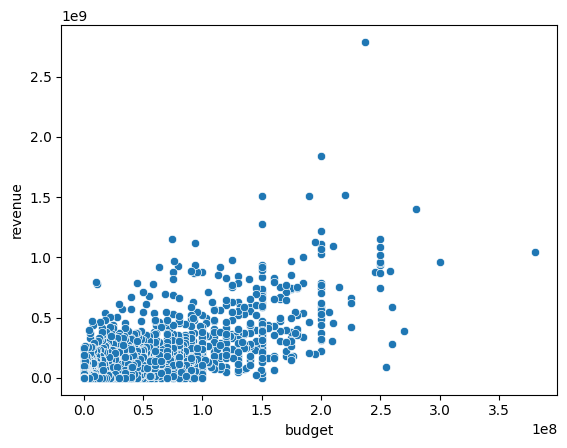

In [11]:
#Budget vs Revenue Analysis:
import seaborn as sns
sns.scatterplot(x='budget', y='revenue', data=df)
plt.show()

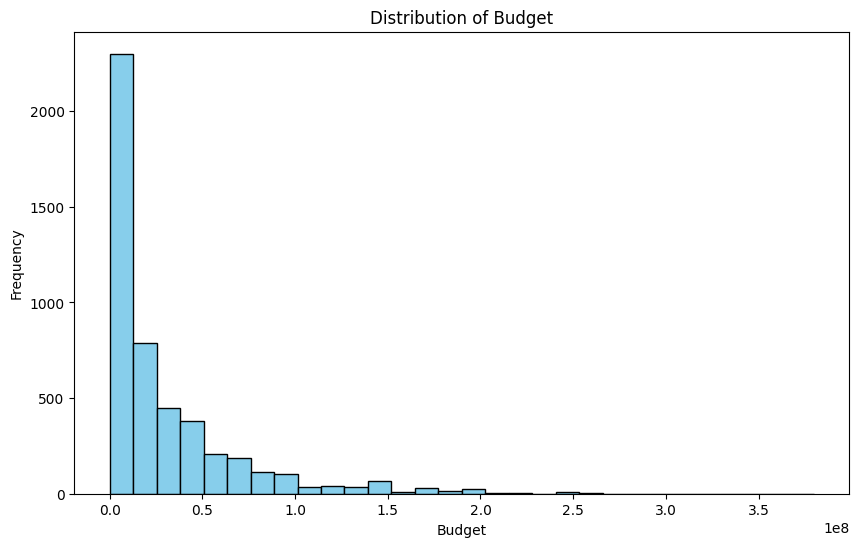

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['budget'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()


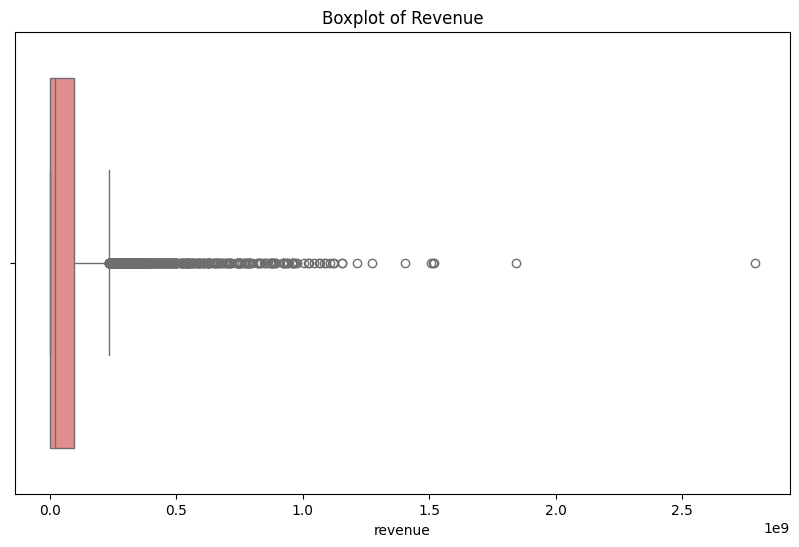

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='revenue', data=df, color='lightcoral')
plt.title('Boxplot of Revenue')
plt.show()

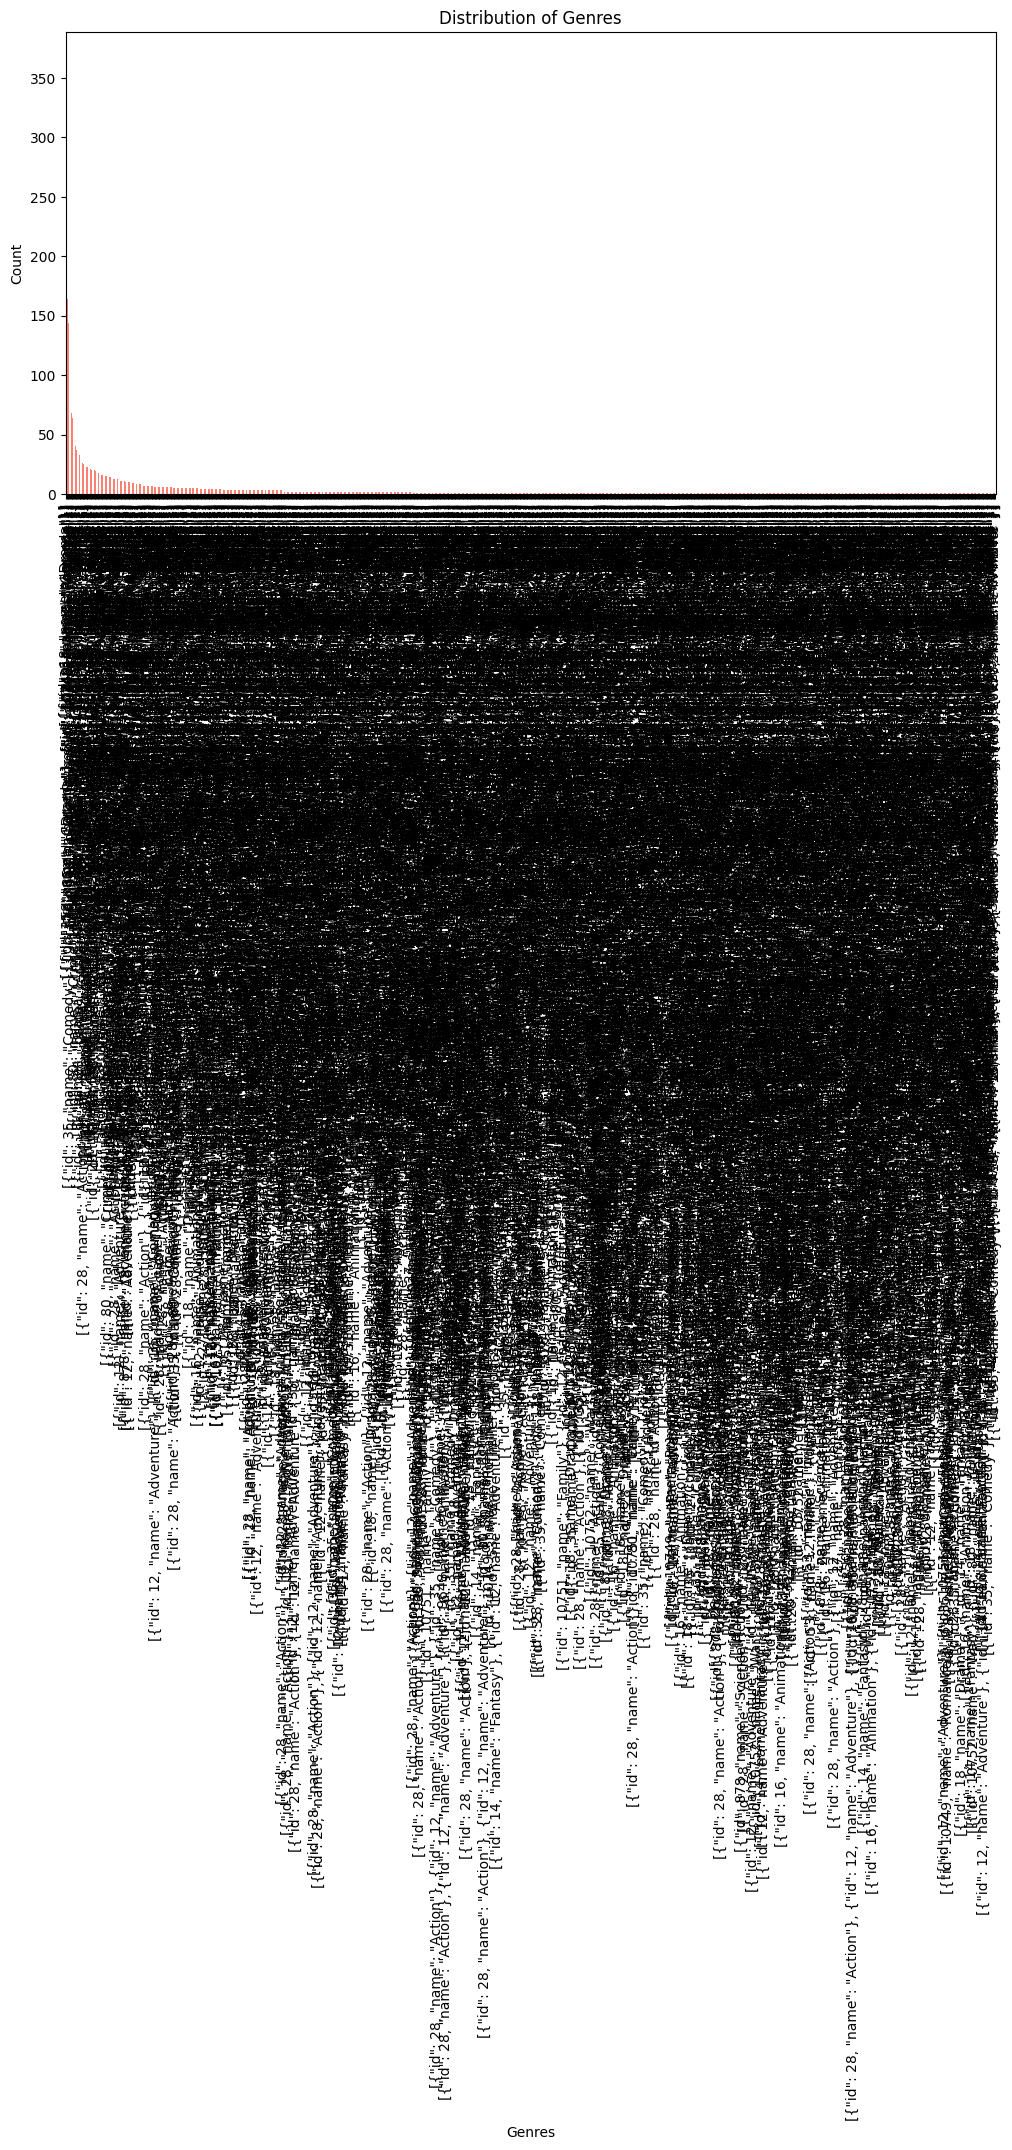

In [14]:
genre_counts = df['genres'].explode().value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

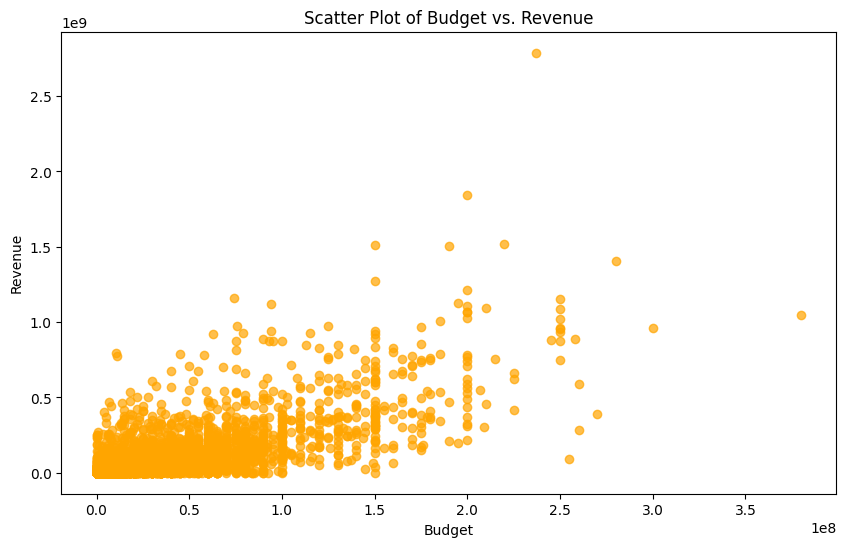

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], color='orange', alpha=0.7)
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

C:\Users\axe\AppData\Local\Temp\ipykernel_18092\3083296586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='original_language', data=df, palette='viridis')


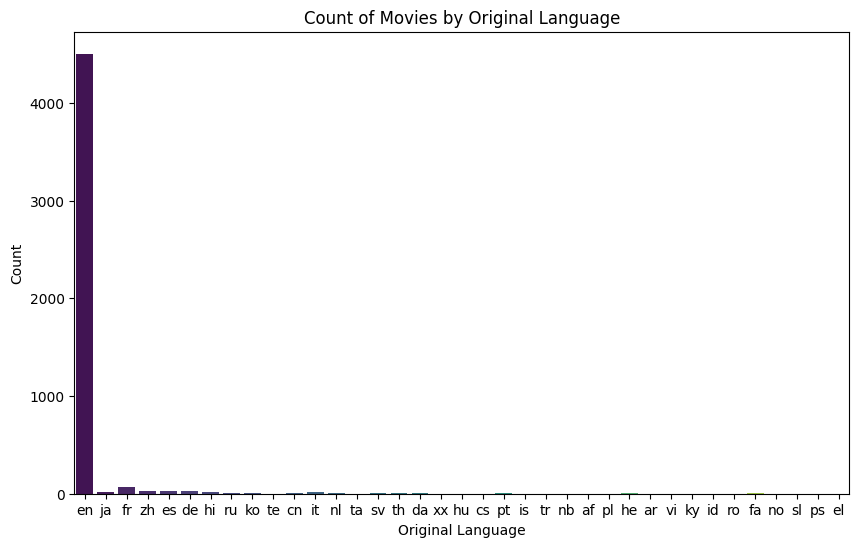

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='original_language', data=df, palette='viridis')
plt.title('Count of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.show()


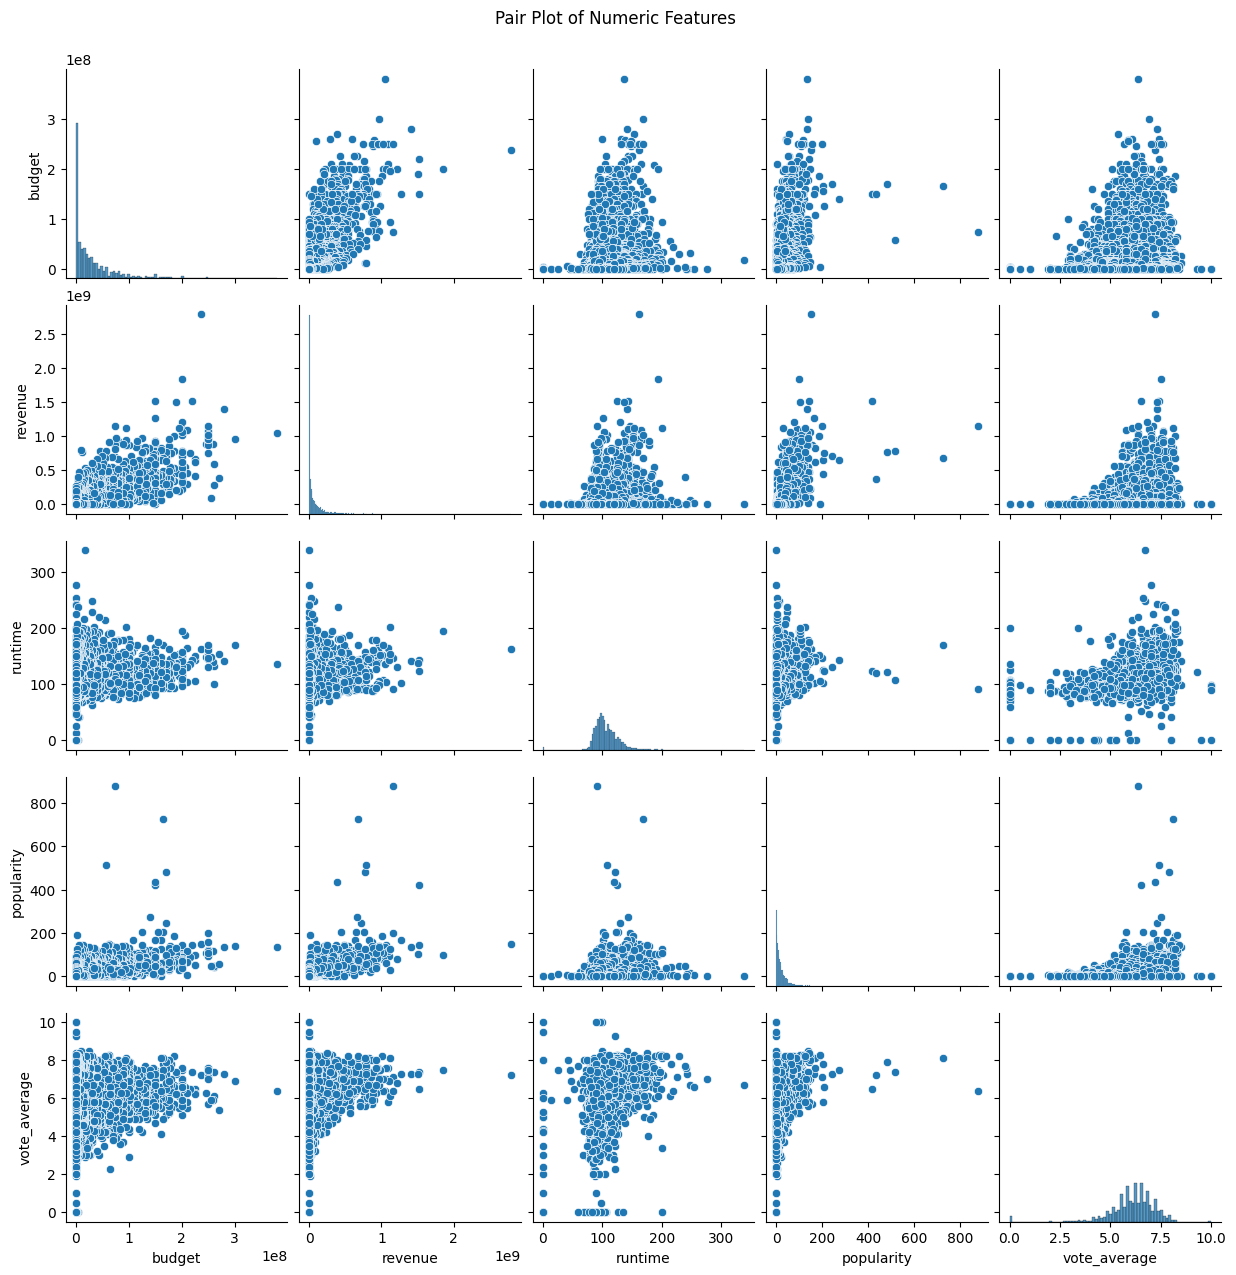

In [17]:
sns.pairplot(df[['budget', 'revenue', 'runtime', 'popularity', 'vote_average']])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


In [18]:
#Genre Distribution:
genre_counts = df['genres'].value_counts()
print(genre_counts)

genres
[{"id": 18, "name": "Drama"}]                                                                                                            370
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                              142
                                                                                                                                        ... 
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]            1
[{"id"

In [19]:
#Data Modeling
# Define target variable (e.g., binary: profitable or not)
df['profitable'] = (df['revenue'] > df['budget']).astype(int)

In [20]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profitable
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989,0.538205
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,0.498590
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000,0.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000,1.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000,1.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,1.000000


In [21]:
df['profitable'].value_counts()

profitable
1    2585
0    2218
Name: count, dtype: int64

In [22]:
df[['tagline','overview','title_x', 'title_y','profitable']]


,tagline,overview,title_x,title_y,profitable
0,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",Avatar,Avatar,1
1,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,1
2,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,Spectre,Spectre,1
3,The Legend Ends,Following the death of District Attorney Harve...,The Dark Knight Rises,The Dark Knight Rises,1
4,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",John Carter,John Carter,1
...,...,...,...,...,...
4798,"He didn't come looking for trouble, but troubl...",El Mariachi just wants to play his guitar and ...,El Mariachi,El Mariachi,1
4799,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,Newlyweds,Newlyweds,0
4800,NaN,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered","Signed, Sealed, Delivered",0
4801,A New Yorker in Shanghai,When ambitious New York attorney Sam is sent t...,Shanghai Calling,Shanghai Calling,0


In [23]:
# Drop columns that are not needed for modeling or analysis
columns_to_drop = ['tagline', 'overview', 'title_x', 'title_y']
df_cleaned = df.drop(columns=columns_to_drop)

# Drop rows with missing values in specific columns
columns_with_missing_values = ['release_date', 'runtime']
df_cleaned = df_cleaned.dropna(subset=columns_with_missing_values)

# Convert 'release_date' column to datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# Impute missing values in the 'runtime' column with the mean value
df_cleaned['runtime'].fillna(df_cleaned['runtime'].mean(), inplace=True)

# Check for and handle duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify the cleaned DataFrame
print(df_cleaned.info())
df=df_cleaned


<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   keywords              4800 non-null   object        
 3   original_language     4800 non-null   object        
 4   original_title        4800 non-null   object        
 5   popularity            4800 non-null   float64       
 6   production_companies  4800 non-null   object        
 7   production_countries  4800 non-null   object        
 8   release_date          4800 non-null   datetime64[ns]
 9   revenue               4800 non-null   int64         
 10  runtime               4800 non-null   float64       
 11  spoken_languages      4800 non-null   object        
 12  status                4800 non-null   object        
 13  vote_average          4

C:\Users\axe\AppData\Local\Temp\ipykernel_18092\3688171041.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['runtime'].fillna(df_cleaned['runtime'].mean(), inplace=True)


In [24]:
# Feature engineering
# Select relevant features
features = [
    'budget',
    'genres',
    'runtime',
    'release_date',
    'popularity',
    'production_companies',
    'original_language',
    'vote_average',
    'cast',
    'crew'
]


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df['profitable'], test_size=0.2, random_state=42)

In [25]:
#Logistic Regression
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

# Define features
numeric_features = ['budget', 'runtime', 'popularity', 'vote_average']
categorical_features = ['genres']

# Create preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create pipeline with preprocessor and Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
lr_predictions = pipeline.predict(X_test)


# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, lr_predictions)}')
print(f'Precision: {precision_score(y_test, lr_predictions)}')
print(f'Recall: {recall_score(y_test, lr_predictions)}')
print(f'F1-Score: {f1_score(y_test, lr_predictions)}')

Accuracy: 0.7708333333333334
Precision: 0.8108108108108109
Recall: 0.7514450867052023
F1-Score: 0.78


In [26]:
df.head()

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,profitable
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['genres'].fillna(''))

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie suggestions
def get_movie_suggestions(movie_title):
    matching_rows = df[df['original_title'] == movie_title]

    if matching_rows.empty:
        return f"No movie found with the title '{movie_title}' in the dataset."

    idx = matching_rows.index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    if len(sim_scores) < 2:
        return "Insufficient data to provide suggestions."

    movie_indices = [i[0] for i in sim_scores[1:6]]
    return df['original_title'].iloc[movie_indices]



# Example usage
movie_suggestions = get_movie_suggestions('Avatar')
print(movie_suggestions)



10               Superman Returns
14                   Man of Steel
46     X-Men: Days of Future Past
61              Jupiter Ascending
232                 The Wolverine
Name: original_title, dtype: object


Logistic Regression:
Accuracy: 0.7708333333333334
Precision: 0.8108108108108109
Recall: 0.7514450867052023
F1-Score: 0.78
ROC-AUC: 0.8476356502780945

Decision Tree:
Accuracy: 0.7375
Precision: 0.7467652495378928
Recall: 0.7784200385356455
F1-Score: 0.7622641509433963
ROC-AUC: 0.7338812210818817

Random Forest:
Accuracy: 0.7875
Precision: 0.8058252427184466
Recall: 0.7996146435452793
F1-Score: 0.8027079303675049
ROC-AUC: 0.8570095989584017

XGBoost:
Accuracy: 0.7791666666666667
Precision: 0.7912713472485768
Recall: 0.8034682080924855
F1-Score: 0.7973231357552581
ROC-AUC: 0.8497131672193604

SVM:
Accuracy: 0.6708333333333333
Precision: 0.6688851913477537
Recall: 0.7745664739884393
F1-Score: 0.7178571428571429
ROC-AUC: 0.7236618475264223

KNN:
Accuracy: 0.7375
Precision: 0.7440585009140768
Recall: 0.7842003853564548
F1-Score: 0.7636022514071295
ROC-AUC: 0.795671512021636

Gradient Boosting:
Accuracy: 0.7927083333333333
Precision: 0.803030303030303
Recall: 0.8169556840077071
F1-Score: 0.8

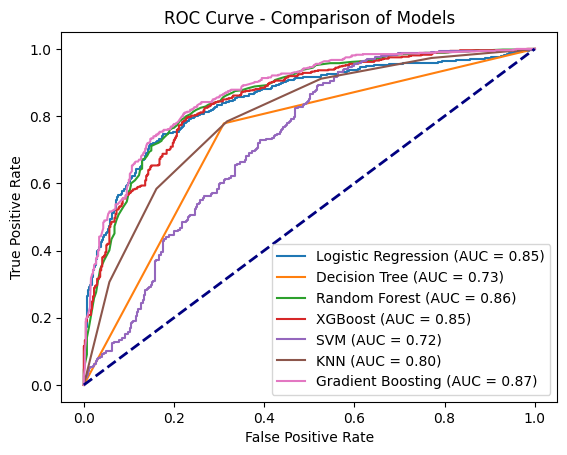

In [28]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Define features
numeric_features = ['budget', 'runtime', 'popularity', 'vote_average']
categorical_features = ['genres']

# Create preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# List of models to try
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Enable probability estimation
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluate and plot results for each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

    # Print results
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    print()

    # Plot ROC-AUC curve
    fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC-AUC for all models
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparison of Models')
plt.legend(loc='lower right')
plt.show()


Another Metod(Clustering)

In [29]:
df_credits.columns=['id','title','cast','crew']
df=df_movies.merge(df_credits,on='id')

In [30]:
# Apply the literal_eval function to each element in the specified feature column
features = ['cast', 'crew', 'keywords', 'genres']
df[features] = df[features].applymap(lambda x: literal_eval(x))


C:\Users\axe\AppData\Local\Temp\ipykernel_18092\3907192166.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[features] = df[features].applymap(lambda x: literal_eval(x))


In [31]:
# Extract the director's name from the crew feature. Return NaN if director is not listed.
def extract_director(x):
    # Check each crew member's job, return director's name if found, otherwise return NaN
    return next((i['name'] for i in x if i['job'] == 'Director'), np.nan)


In [32]:
# Return the list of the top 3 elements or the entire list; whichever is more.
def extract_list(x):
    # Check if the input is a list
    if isinstance(x, list):
        # Extract names from each element in the list
        names = [i['name'] for i in x]
        # Return the first three elements if more than 3 exist, otherwise return the entire list
        return names[:3] if len(names) > 3 else names

    # Return an empty list in case of missing/malformed data
    return list()

In [33]:
df['director']=df['crew'].apply(extract_director)

In [34]:
# Define new in a suitable form.
features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(extract_list)

In [35]:
# Convert all strings to lowercase and strip names of spaces
def clean_data(x):
    # Check if the input is a list
    if isinstance(x, list):
        # Return a list of lowercase names with spaces removed
        return [str.lower(i.replace(" ", "")) for i in x]
    # Check if the input is a string
    elif isinstance(x, str):
        # Return the lowercase string with spaces removed
        return str.lower(x.replace(" ", ""))
    # Return an empty string in case of missing/malformed data
    return ''


In [36]:
# Apply clean_data function to specified features in the DataFrame
features = ['cast', 'keywords', 'director', 'genres']
df[features] = df[features].applymap(clean_data)


C:\Users\axe\AppData\Local\Temp\ipykernel_18092\309352934.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[features] = df[features].applymap(clean_data)


In [37]:
# Create a soup column by combining keywords, cast, director, and genres
df['soup'] = df.apply(lambda x: ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres']), axis=1)


In [38]:
# Create CountVectorizer with English stop words
count_matrix = CountVectorizer(stop_words='english').fit_transform(df['soup'])


In [39]:
dense_count_matrix = CountVectorizer(stop_words='english').fit_transform(df['soup']).toarray()

In [40]:
dense_count_matrix[1].size

11520

In [41]:

class ElbowMethod:
    def __init__(self, data, max_clusters=10):
        self.data = data
        self.max_clusters = max_clusters
        self.distortions = []
        self.silhouette_scores = []

    def fit(self):
        for i in range(1, self.max_clusters + 1):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
            kmeans.fit(self.data)
            self.distortions.append(kmeans.inertia_)
            if i > 1:
                self.silhouette_scores.append(silhouette_score(self.data, kmeans.labels_))

    def plot(self, metric='distortion'):
        plt.figure(figsize=(16, 5))
        if metric == 'distortion':
            plt.plot(range(1, self.max_clusters + 1), self.distortions, marker='o')
            plt.title('Elbow Method for Optimal k')
            plt.ylabel('Distortion')
        elif metric == 'silhouette':
            plt.plot(range(2, self.max_clusters + 1), self.silhouette_scores, marker='o')
            plt.title('Silhouette Score for Optimal k')
            plt.ylabel('Silhouette Score')
        plt.xlabel('Number of Clusters (k)')
        plt.show()

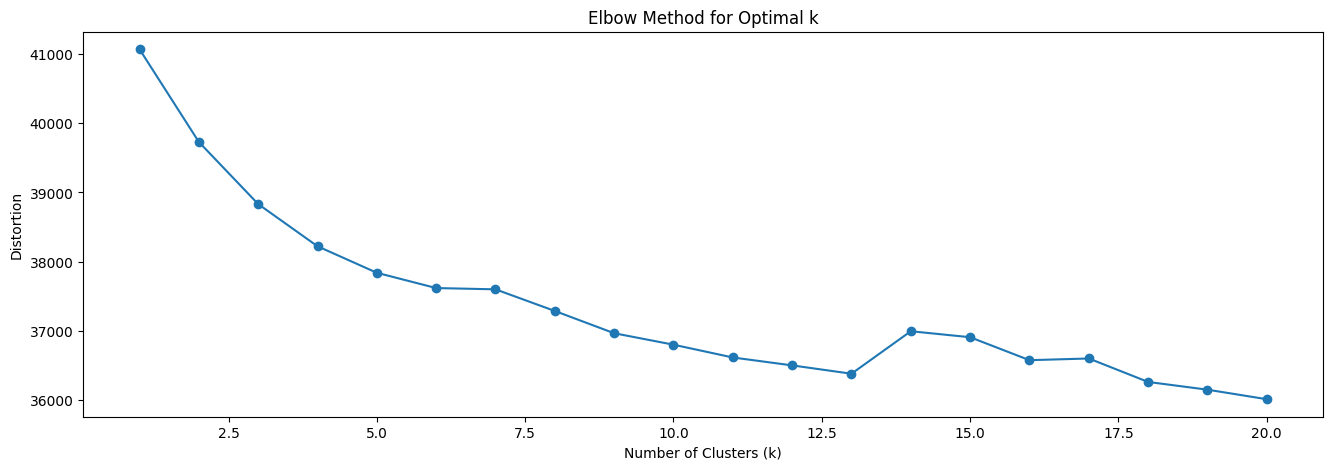

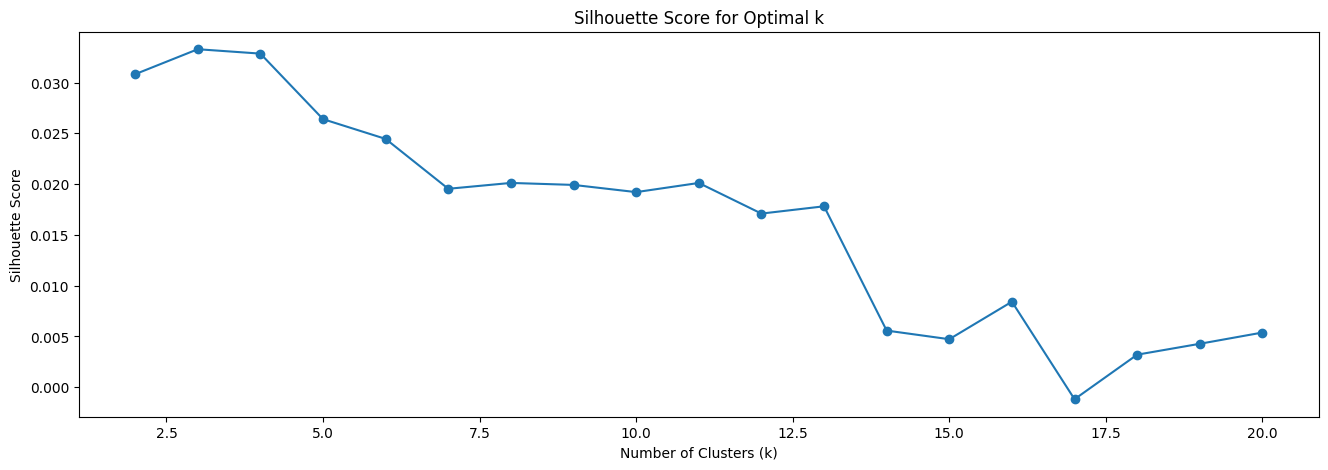

In [42]:
elbow_method = ElbowMethod(data=dense_count_matrix, max_clusters=20)

# Fit and plot elbow method and silhouette score
elbow_method.fit()
elbow_method.plot(metric='distortion')
elbow_method.plot(metric='silhouette')


In [43]:
n_clusters = 6
df['cluster'] = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(dense_count_matrix)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [45]:
for cluster_id, cluster_samples in df.groupby('cluster')['title_x']:
    print(f"Cluster {cluster_id}: {cluster_samples.tolist()}")


Cluster 0: ['Pearl Harbor', 'How Do You Know', 'The Princess and the Frog', 'Town & Country', 'Little Fockers', 'Sex and the City 2', 'Cinderella', 'The Holiday', "It's Complicated", 'Nutty Professor II: The Klumps', "Something's Gotta Give", 'Four Christmases', 'Just Go with It', 'Zookeeper', 'Little Nicky', '50 First Dates', "Fool's Gold", 'Dr. Dolittle 2', 'Runaway Bride', 'What Women Want', "You've Got Mail", 'Focus', 'This Means War', 'The American President', 'The Love Guru', 'Meet the Fockers', 'Two Weeks Notice', 'Couples Retreat', 'The Family Man', 'Duplicity', 'Intolerable Cruelty', 'Just Like Heaven', 'Leatherheads', 'Forrest Gump', 'Meet the Parents', 'The Nutty Professor', 'Hitch', 'American Wedding', 'Maid in Manhattan', 'Elizabethtown', 'You, Me and Dupree', 'The Break-Up', 'Mamma Mia!', "Valentine's Day", 'Man on the Moon', 'Jerry Maguire', 'As Good as It Gets', 'Mr. Deeds', 'How to Lose a Guy in 10 Days', 'Interview with the Vampire', 'Crazy, Stupid, Love.', 'Bridget J

In [46]:
def get_movie_recommendations_by_cluster(movie_title, movies_data):
    input_movie_cluster = movies_data.loc[movies_data['title_x'] == movie_title, 'cluster'].values[0]
    return movies_data[(movies_data['cluster'] == input_movie_cluster) & (movies_data['title_x'] != movie_title)][['cluster', 'title_x', 'id']]




In [47]:
movie_title = "The Dark Knight"
recommended_movies_df = get_movie_recommendations_by_cluster(movie_title, df)

# Print the recommended movies DataFrame
print(recommended_movies_df)

      cluster                   title_x      id
2           3                   Spectre  206647
3           3     The Dark Knight Rises   49026
58          3               Rush Hour 3    5174
72          3             Suicide Squad  297761
99          3  The Fast and the Furious    9799
...       ...                       ...     ...
4664        3                   Bronson   18533
4735        3         The Night Visitor   72086
4778        3                   Rampage   38780
4792        3                      Cure   36095
4798        3               El Mariachi    9367

[269 rows x 3 columns]


In [48]:
movie_title = "Avengers: Age of Ultron"
recommended_movies_df = get_movie_recommendations_by_cluster(movie_title, df)

# Print the recommended movies DataFrame
print(recommended_movies_df)

      cluster                                   title_x     id
0           2                                    Avatar  19995
1           2  Pirates of the Caribbean: At World's End    285
4           2                               John Carter  49529
5           2                              Spider-Man 3    559
8           2    Harry Potter and the Half-Blood Prince    767
...       ...                                       ...    ...
4620        2                      Fighting Tommy Riley  47534
4654        2                                       Ink  24869
4669        2             The Beast from 20,000 Fathoms  35073
4670        2                                   Mad Max   9659
4769        2                   The Legend of God's Gun  69382

[660 rows x 3 columns]


In [49]:
movie_title = df['original_title'].sample().iloc[0]
recommended_movies_df = get_movie_recommendations_by_cluster(movie_title, df)

# Print the recommended movies DataFrame
print(f'recommended movies based on{movie_title} is : ')
print(recommended_movies_df)

recommended movies based onReservoir Dogs is : 
      cluster                title_x      id
2           3                Spectre  206647
3           3  The Dark Knight Rises   49026
58          3            Rush Hour 3    5174
65          3        The Dark Knight     155
72          3          Suicide Squad  297761
...       ...                    ...     ...
4664        3                Bronson   18533
4735        3      The Night Visitor   72086
4778        3                Rampage   38780
4792        3                   Cure   36095
4798        3            El Mariachi    9367

[269 rows x 3 columns]


In [50]:
# Use MultiLabelBinarizer to create a binary matrix for genres
genres_matrix = MultiLabelBinarizer().fit_transform(df['genres'])

# Compute cosine similarity between movies based on genres
cosine_sim_genres = cosine_similarity(genres_matrix, genres_matrix)

# Perform hierarchical clustering
num_clusters_genres = 63  # Example: choose the number of clusters
linkage_matrix_genres = linkage(cosine_sim_genres, 'ward')

# Assign cluster labels to movies
df['cluster_genres'] = fcluster(linkage_matrix_genres, num_clusters_genres, criterion='maxclust')

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming mlb has been defined before
mlb = MultiLabelBinarizer()
genres_matrix = mlb.fit_transform(df['genres'])
# Compute cosine similarity between movies based on genres
cosine_sim_genres = cosine_similarity(genres_matrix, genres_matrix)

# Perform hierarchical clustering
num_clusters_genres = 63  # Example: choose the number of clusters
linkage_matrix_genres = linkage(cosine_sim_genres, 'ward')

# New movie
new_movie_title = "New Movie"
new_movie_genres = ['Action', 'Adventure', 'Science Fiction']

# Use MultiLabelBinarizer to transform new movie genres
new_movie_genres_matrix = mlb.transform([new_movie_genres])

# Compute cosine similarity between the new movie and existing movies based on genres
cosine_sim_new_movie = cosine_similarity(new_movie_genres_matrix, genres_matrix)

# Find the cluster label for the new movie using hierarchical clustering
new_movie_cluster_label = fcluster(linkage_matrix_genres, t=num_clusters_genres, criterion='maxclust')

# Print the cluster label for the new movie
print(f"{new_movie_title} belongs to Cluster {new_movie_cluster_label}")

# If we  want to add the new movie to the DataFrame
# df.loc[len(df)] = [new_movie_title, new_movie_genres, new_movie_cluster_label]


New Movie belongs to Cluster [44 44 46 ...  1 51 49]


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Action', 'Adventure', 'Science Fiction'] will be ignored
  warnings.warn(


In [52]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the MultiLabelBinarizer on the existing genres in the DataFrame
genres_matrix = mlb.fit_transform(df['genres'])

# Calculate similarity between the new movie and each cluster
cluster_similarity = {cluster_id: cosine_similarity(mlb.transform([new_movie_genres]), genres_matrix[df['cluster_genres'] == cluster_id]).mean() for cluster_id in range(1, num_clusters_genres + 1)}

# Find the cluster with the highest similarity
most_similar_cluster = max(cluster_similarity, key=cluster_similarity.get)


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Action', 'Adventure', 'Science Fiction'] will be ignored
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Action', 'Adventure', 'Science Fiction'] will be ignored
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Action', 'Adventure', 'Science Fiction'] will be ignored
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessin

In [53]:
# Recommending similar movies
recommended_movies = df[df['cluster_genres'] == most_similar_cluster][['title_x', 'genres']]
print("Recommended Movies for the New Movie:")
print(recommended_movies)


Recommended Movies for the New Movie:
                        title_x                    genres
226             How Do You Know  [comedy, drama, romance]
323          Sex and the City 2  [comedy, drama, romance]
438      Something's Gotta Give  [drama, comedy, romance]
440            Four Christmases  [comedy, romance, drama]
681      The American President  [comedy, drama, romance]
...                         ...                       ...
4703                    Tadpole  [comedy, drama, romance]
4749      The Brothers McMullen  [comedy, drama, romance]
4752             Tiny Furniture  [romance, comedy, drama]
4784            The Puffy Chair  [drama, comedy, romance]
4800  Signed, Sealed, Delivered  [comedy, drama, romance]

[195 rows x 2 columns]
